### Mall Customers Segment

Dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load Data from file
data=pd.read_csv(r'C:\Users\RUSHI\Desktop\big gap ml\mall customer segmentation\Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#check missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [6]:
#drop CustomerID columns
data.drop('CustomerID',axis=1,inplace=True)

In [7]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


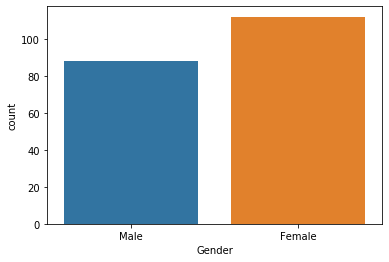

In [8]:
sns.countplot(data['Gender'])

 from above plot observed that Female customers are more as compare to Male customers

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <a list of 10 Patch objects>)

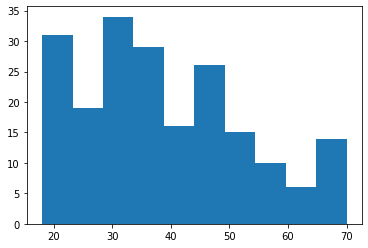

In [12]:
plt.hist(data['Age'])

From the Histogram it is evident that there are 3 age groups that are more frequently shop at the mall, they are: 15-22 years, 30-40 years and 45-50 years.

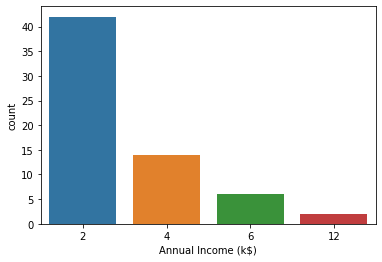

In [13]:
sns.countplot(data['Annual Income (k$)'].value_counts())

From above graph we observed that most of the customer have salary of 2K$

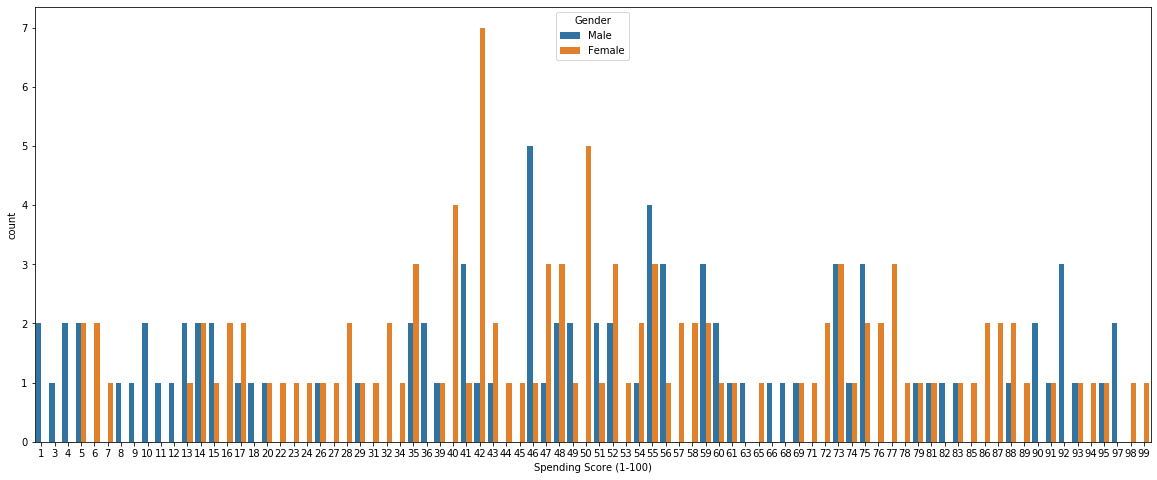

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(data['Spending Score (1-100)'],hue=data['Gender'])

Above graphs shows that female customers spend more as compare to Male customers

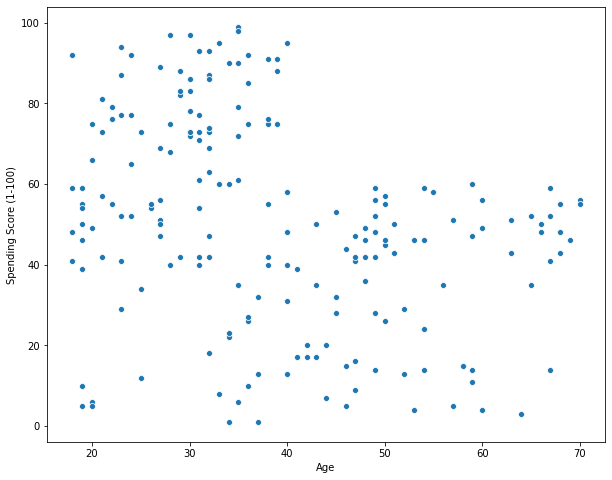

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(data['Age'],data['Spending Score (1-100)'])

1. From the Age Vs Spending Score plot we observe that customers whose spending score is more than 65 have their Age in the range of 15-42 years. Also from the Scatter plot it is observed that customers whose spending score is more than 65 consists of more Females than Males.

2. Also, the customers having average spending score ie: in the range of 40-60 consists of age group of the range 15-75 years and the count of Male and Female in this age group is also approximatly the same.

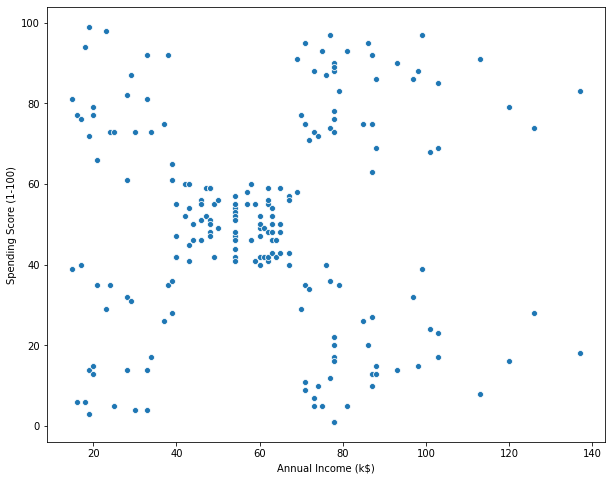

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'])

In [27]:
x = data.iloc[:, [2,3]]

In [28]:
x.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

#### Finding optimal number of clusters using Elbow Method

In [29]:
from sklearn.cluster import KMeans
ar=[]
for i in range(1,11):
    model=KMeans(n_clusters = i, init = 'k-means++',  random_state = 0)
    model.fit(x)
    ar.append(model.inertia_)

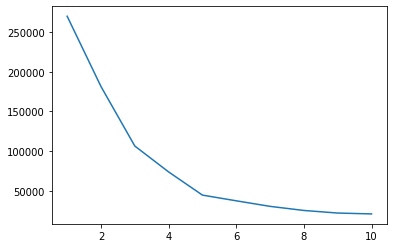

In [30]:
plt.plot(range(1,11),ar)

From the above plot it is observed that 5 clusters are optimal for the given dataset.

Feature Scalling

In [31]:
# Model Building 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [32]:
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(x)

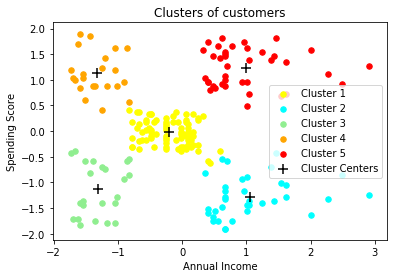

In [37]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 30, c = 'cyan', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 30, c = 'orange', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 30, c = 'red', label = 'Cluster 5')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

a. High Income, High Spending Score (Cluster 5) - Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.

b. High Income, Low Spending Score (Cluster 3) - Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.

c. Average Income, Average Spending Score (Cluster 2) - Can target these set of customers by providing them with Low cost EMI's etc.

d. Low Income, High Spending Score (Cluster 1) - May or may not target these group of customers based on the policy of the mall.

e. Low Income, Low Spending Score (Cluster 4) - Don't target these customers since they have less income and need to save money.